In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("B_encoded_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [3]:
Model_1 = KNeighborsRegressor()

# 2. Setup Pipeline

In [4]:

RG = Model_1

In [5]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("RG",RG)])

In [6]:
param_grid = {
    "RG__n_neighbors":[1,4,5,6,7,8,10]
    
}

# 3. Setup GridSearch

In [7]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [8]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=Pipeline(steps=[('RG', KNeighborsRegressor())]),
             n_jobs=-1, param_grid={'RG__n_neighbors': [1, 4, 5, 6, 7, 8, 10]},
             scoring='neg_mean_squared_error')

In [9]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.446):
{'RG__n_neighbors': 10}


In [10]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
6,0.350863,0.050353,0.123669,0.038070,10,{'RG__n_neighbors': 10},-0.430180,-0.351659,-0.470653,-0.498831,-0.421575,-0.341952,-0.496442,-0.543847,-0.498101,-0.402420,-0.445566,0.063798,1
5,0.526393,0.110951,0.170246,0.069144,8,{'RG__n_neighbors': 8},-0.440169,-0.357822,-0.465770,-0.505016,-0.429292,-0.347591,-0.500582,-0.561839,-0.507663,-0.407345,-0.452309,0.065531,2
4,0.443515,0.181885,0.235371,0.089497,7,{'RG__n_neighbors': 7},-0.442463,-0.365429,-0.478609,-0.506204,-0.429222,-0.354454,-0.497862,-0.575088,-0.506239,-0.426878,-0.458245,0.064578,3
3,0.335303,0.066680,0.113597,0.062394,6,{'RG__n_neighbors': 6},-0.449412,-0.363298,-0.484672,-0.503669,-0.434418,-0.350867,-0.504801,-0.569264,-0.517359,-0.423478,-0.460124,0.065661,4
2,0.330217,0.062683,0.107612,0.030868,5,{'RG__n_neighbors': 5},-0.457249,-0.376377,-0.507106,-0.507620,-0.432008,-0.369458,-0.512856,-0.572535,-0.540986,-0.437807,-0.471400,0.064558,5
1,0.233974,0.062850,0.082380,0.025525,4,{'RG__n_neighbors': 4},-0.467183,-0.398819,-0.514254,-0.508008,-0.445189,-0.398942,-0.513105,-0.601767,-0.563265,-0.459598,-0.487013,0.062670,6
0,0.220411,0.063726,0.076097,0.021038,1,{'RG__n_neighbors': 1},-0.602591,-0.701326,-0.692598,-0.750550,-0.684262,-0.793532,-0.789625,-0.877572,-0.929488,-0.701839,-0.752338,0.092702,7


# 4. Best Hyperparameter

In [11]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__n_neighbors': 10}


# 5. Evaluate Model $log(Sales)$

In [12]:

best_n = parms.iloc[0][0]['RG__n_neighbors']

In [13]:
Model_2 = KNeighborsRegressor(n_neighbors=best_n)

In [14]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [15]:

RG1 = Model_2
RG1.fit(X_train1,Y_train1)

KNeighborsRegressor(n_neighbors=10)

In [16]:
MSE(RG1.predict(X_test1),Y_test1)

0.5280892435010575

In [17]:
result = pd.DataFrame(np.exp(Y_test1))

In [18]:
result["Predicted_sales"] = np.exp(RG1.predict(X_test1))

In [19]:
MSE(result["sales"],result["Predicted_sales"])

451.115596226371

# 5.1 Model using original sales data

In [20]:
Model_3 = KNeighborsRegressor(n_neighbors=best_n)

In [21]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [22]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [23]:

RG2 = Model_3
RG2.fit(X_train2,Y_train2)

KNeighborsRegressor(n_neighbors=10)

In [24]:
MSE(RG2.predict(X_test2),Y_test2)

476.0387904967603

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [25]:
residual = result['sales']-result['Predicted_sales']

In [26]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [27]:
import scipy.stats as sct

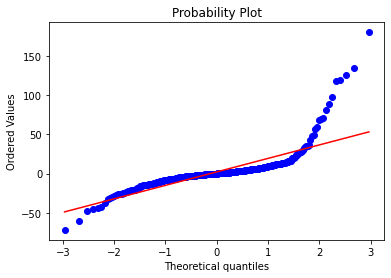

In [28]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [29]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

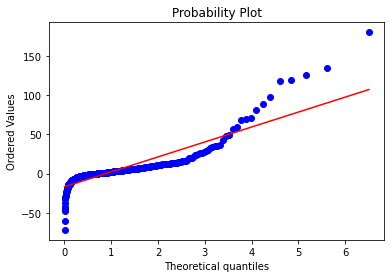

In [30]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [31]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

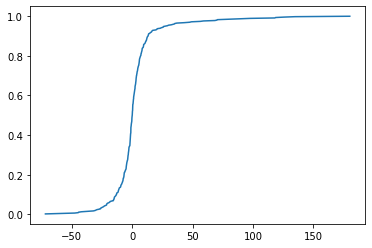

In [32]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

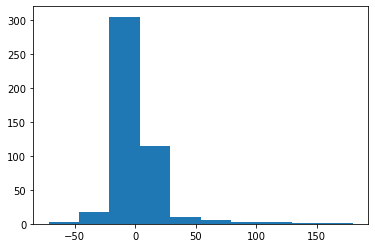

In [33]:
plt.hist(Sample)
plt.show()

In [34]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [35]:
offset = inv(Sample,jumps,2/3)
offset

2.9809698862757603

In [36]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [37]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [38]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [39]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

48376.0

In [40]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

52756.0

In [41]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

52300.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [42]:
Model_4=KNeighborsRegressor(n_neighbors=best_n)

In [43]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data

    
    #Model
    RG_K = Model_4
    RG_K.fit(X_train_K,Y_train_K)
    
    #pca to transform test data

    
    #MSE
    mse_lst.append(MSE(RG_K.predict(X_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(RG_K.predict(X_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [44]:
fraction_table

In [ ]:
profit_table

In [ ]:
profit_table.to_csv(".\\Model_Selection_Result\\3.1B_KNN(No_PCA).csv")